In [1]:
from matplotlib.pyplot import *
% matplotlib inline
from numpy import *
from astropy.io import ascii
import DragScriptV81 as DS

In [2]:
avionics = 0.211
#rocket = 4.49+0.449-0.211####mass has been adjusted
rocket = 5.00-0.211
dry_motor = 1.264 - 0.745
wet_motor = 1.264

print rocket + avionics

5.0


In [31]:
thrust_profile = 'K535_thrust.txt'
rocket_mass = avionics+rocket  #kg
time_res = 0.001
motor_mass = dry_motor
propellant_mass = wet_motor - dry_motor
burn_time = 2.8 # sec
temp = 10.   # Density of air varies with temperature


print rocket_mass + motor_mass  + propellant_mass
print rocket_mass + motor_mass

max_deploy = 53  #percentage opening


t_deploy = 1 #how long it takes to deploy
t_start = 0 # after MECO

drag_f = 1.19


6.264
5.519


MECO at 2.8 sec, at 329.62 m
Apogee at 17.88 sec, at 1609.83 m
MECO at 199.4 m/s


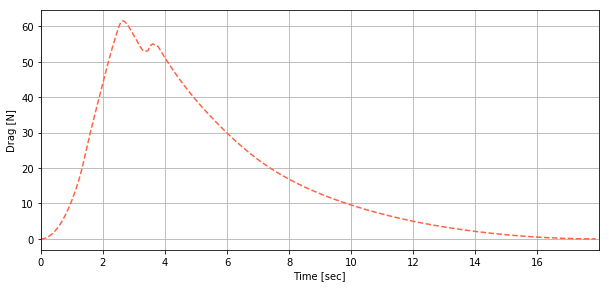

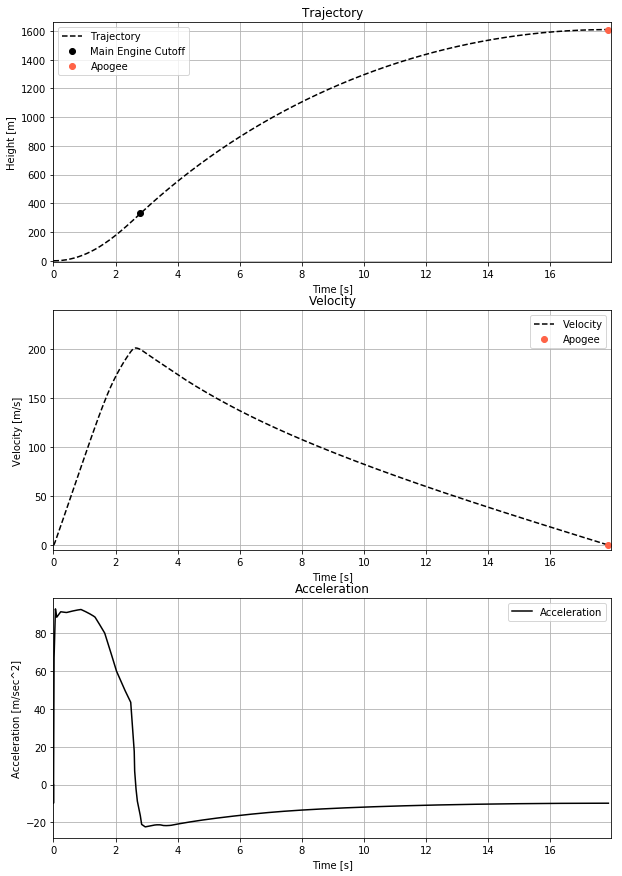

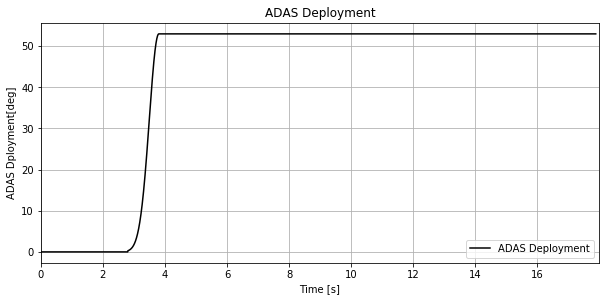

In [32]:
time, velocity, acceleration, height, mass, ADAS, apogee, MECO_vel = DS.num_solver(thrust_profile, rocket_mass, motor_mass, propellant_mass, time_res, temp, burn_time, max_deploy, t_start, t_deploy, 1, drag_f)

In [43]:
k_p = 0.7
k_d = (1-k_p)
k_i = 0
scale = 1
ADAS_max_speed = 100
update_interval = time_res
mixing_factor = 1

MECO at 2.8 sec, at 329.62 m
Apogee at 17.88 sec, at 1609.51 m
MECO at 199.4 m/s


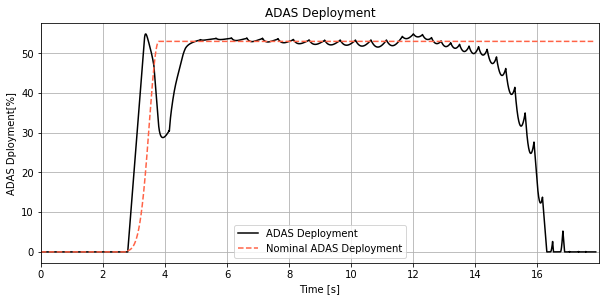

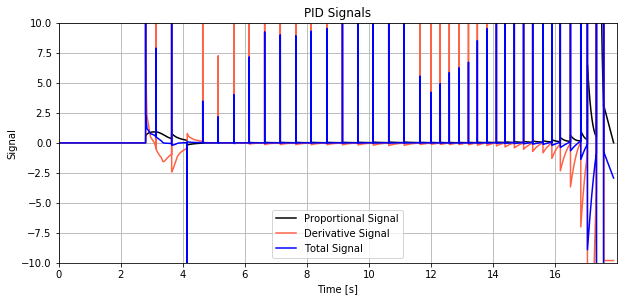

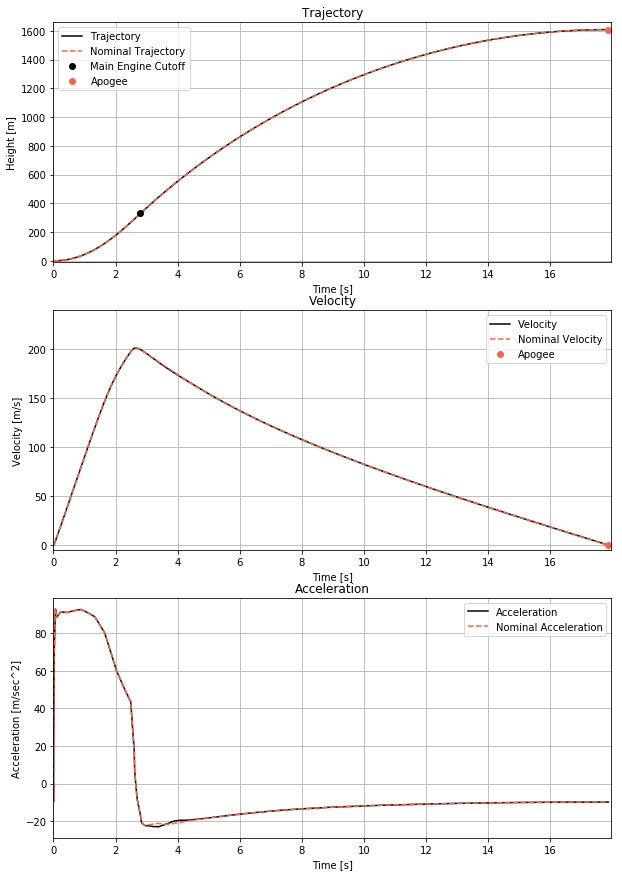

In [44]:
time, velocity, acceleration, height, mass, ADAS, apogee, MECO_vel = DS.PID(thrust_profile, rocket_mass, motor_mass, propellant_mass, time_res, temp, burn_time, max_deploy, t_start, t_deploy, 1, drag_f, k_p, k_d, k_i, scale, ADAS_max_speed, update_interval, mixing_factor)